In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 335M/346M [00:02<00:00, 149MB/s]
100% 346M/346M [00:02<00:00, 127MB/s]


In [ ]:
from zipfile import ZipFile 
file_name = "intel-image-classification.zip"

with ZipFile (file_name ,"r") as zip:
  zip.extractall()
  print ("Done")

Done


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
train_dir = os.path.dirname('/content/seg_train')
test_dir = os.path.dirname('/content/seg_test')
pred_dir = os.path.dirname('/content/seg_pred')

In [ ]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size = 32,
    seed = 123,
    image_size = (160, 160)
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    batch_size = 32,
    seed = 123,
    image_size = (160, 160)
)

pred_ds = keras.preprocessing.image_dataset_from_directory(
    pred_dir,
    batch_size = 32,
    seed = 123,
    image_size = (160, 160)
)

Found 24335 files belonging to 5 classes.
Found 24335 files belonging to 5 classes.
Found 24335 files belonging to 5 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['.config', 'sample_data', 'seg_pred', 'seg_test', 'seg_train']


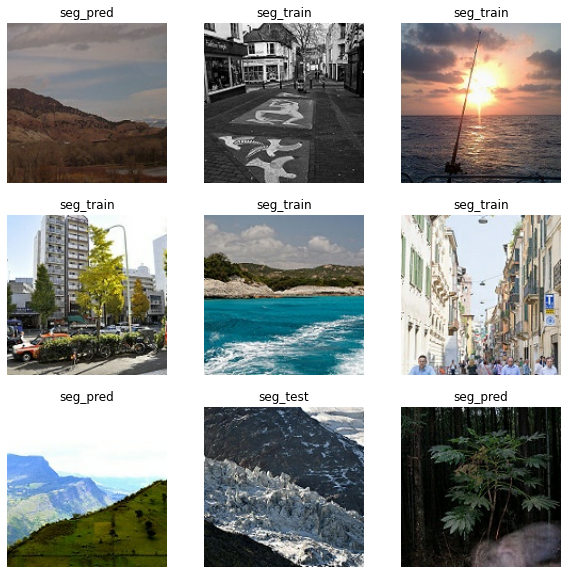

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras.optimizers as Optimizer

model = models.Sequential()
model.add(layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(160,160,3)))
model.add(layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(5,5))
model.add(layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(5,5))
model.add(layers.Flatten())
model.add(layers.Dense(180,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 156, 156, 180)     324180    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 154, 154, 180)     291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 152, 152, 140)     226940    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 140)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 50)        4

In [ ]:
Classifier = model.fit(train_ds, validation_data = test_ds, epochs = 10)

Epoch 1/10
761/761 [==============================] - 680s 878ms/step - loss: 1.3159 - accuracy: 0.4904 - val_loss: 0.9642 - val_accuracy: 0.5767
Epoch 2/10
761/761 [==============================] - 667s 876ms/step - loss: 1.0264 - accuracy: 0.5413 - val_loss: 0.9423 - val_accuracy: 0.5767
Epoch 3/10
761/761 [==============================] - 666s 875ms/step - loss: 0.9951 - accuracy: 0.5615 - val_loss: 0.9446 - val_accuracy: 0.5767
Epoch 4/10
761/761 [==============================] - 665s 873ms/step - loss: 0.9730 - accuracy: 0.5718 - val_loss: 0.9400 - val_accuracy: 0.5767
Epoch 5/10
761/761 [==============================] - 664s 873ms/step - loss: 0.9604 - accuracy: 0.5787 - val_loss: 0.9380 - val_accuracy: 0.5767
Epoch 6/10
761/761 [==============================] - 664s 873ms/step - loss: 0.9538 - accuracy: 0.5797 - val_loss: 0.9397 - val_accuracy: 0.5767
Epoch 7/10
761/761 [==============================] - 663s 871ms/step - loss: 0.9508 - accuracy: 0.5793 - val_loss: 0.9405 -

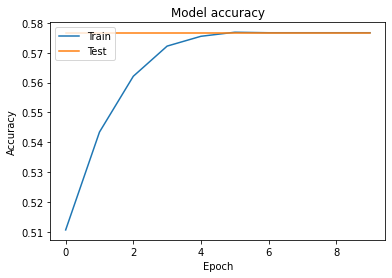

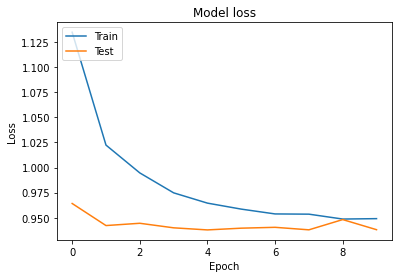

In [ ]:
plt.plot(Classifier.history['accuracy'])
plt.plot(Classifier.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(Classifier.history['loss'])
plt.plot(Classifier.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()